<a href="https://colab.research.google.com/github/ChristeenaGiji/Black-Friday-Dataset-EDA-and-Feature-Engineering/blob/main/Blackfriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Problem Statement

A retail company "ABC Private Limited" wants to understand the customer purchase summary of various customers for selected high volume products from last month. The data set also contians customer demographics (age, gender,maritial status,city_type,stay_in_current_city),product details(product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalised offer for customers against different products

In [4]:
df_test=pd.read_csv('/content/test.csv')

In [5]:
df_train =pd.read_csv('/content/train.csv')

In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594990 entries, 0 to 594989
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     594990 non-null  int64  
 1   Product_ID                  594990 non-null  object 
 2   Gender                      594990 non-null  object 
 3   Age                         594990 non-null  object 
 4   Occupation                  594990 non-null  int64  
 5   City_Category               594990 non-null  object 
 6   Stay_In_Current_City_Years  594990 non-null  object 
 7   Marital_Status              594990 non-null  int64  
 8   Product_Category_1          594990 non-null  int64  
 9   Product_Category_2          410679 non-null  float64
 10  Product_Category_3          181787 non-null  float64
 11  Purchase                    361391 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 54.5+ MB


In [13]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.949900e+05,594990.000000,594990.000000,594990.000000,410679.000000,181787.000000,361391.000000
mean,1.002989e+06,8.078168,0.410323,5.287146,9.846503,12.659508,9325.319510
std,1.736781e+03,6.525981,0.491893,3.742325,5.090675,4.127847,4976.986649
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001449e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003024e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004449e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12066.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [14]:
df.drop(['User_ID'],axis=1,inplace=True)

#Handling Categorical feature -Gender


In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
594985,True,False
594986,True,False
594987,True,False
594988,True,False


method 1: Mapping


In [17]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [22]:
##method2:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

#Handling categorical feature - Age

In [23]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

method 1 : not used much

In [28]:
# pd.get_dummies(df['Age'])

In [27]:
#pd.get_dummies(df['Age'],drop_first=True)

method 2: Use target coding

In [29]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

method 3: Label encoding - not a good pratice





In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Age']=le.fit_transform(df['Age'])

In [32]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

Fixing categorical City_category

In [36]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [39]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [41]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [42]:
#drop city category
df.drop('City_Category',axis=1,inplace=True)

In [43]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,6,16,4+,0,8,NaN,NaN,7969.0,False,True


In [44]:
#Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            184311
Product_Category_3            413203
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [45]:
##Focus on replacing missing values

In [46]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [48]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     69567
14.0    60298
2.0     53824
16.0    47142
15.0    41359
5.0     28389
4.0     28126
6.0     18022
11.0    15430
17.0    14593
13.0    11511
9.0      6211
12.0     5965
10.0     3344
3.0      3153
18.0     3101
7.0       644
Name: count, dtype: int64

In [51]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [52]:
df['Product_Category_2'].mode()[0]

8.0

In [49]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [53]:
df['Product_Category_2'].isnull().sum()

0

In [54]:
## Product category 3 replace missing values

In [55]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [57]:
df.shape

(594990, 12)

In [58]:
# 594990 values in which 413203 are missing

###replacing 4+ with 4 years

In [63]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [61]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [62]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,False,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,True,6,16,4,0,8,8.0,16.0,7969.0,False,True


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594990 entries, 0 to 594989
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  594990 non-null  object 
 1   Gender                      594990 non-null  bool   
 2   Age                         594990 non-null  int64  
 3   Occupation                  594990 non-null  int64  
 4   Stay_In_Current_City_Years  594990 non-null  object 
 5   Marital_Status              594990 non-null  int64  
 6   Product_Category_1          594990 non-null  int64  
 7   Product_Category_2          594990 non-null  float64
 8   Product_Category_3          594990 non-null  float64
 9   Purchase                    361391 non-null  float64
 10  B                           594990 non-null  bool   
 11  C                           594990 non-null  bool   
dtypes: bool(3), float64(3), int64(4), object(2)
memory usage: 42.6+ MB


convert object to integers

In [148]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors='coerce').fillna(0).astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)

In [149]:
print(df['Stay_In_Current_City_Years'].unique())
print(df['B'].unique())
print(df['C'].unique())
print(df['Gender'].unique())
print(df['Age'].unique())


[0]
[0 1]
[0 1]
[0 1]
[0 6 2 4 5 3 1]


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594990 entries, 0 to 594989
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  594990 non-null  object 
 1   Gender                      594990 non-null  int64  
 2   Age                         594990 non-null  int64  
 3   Occupation                  594990 non-null  int64  
 4   Stay_In_Current_City_Years  594990 non-null  int64  
 5   Marital_Status              594990 non-null  int64  
 6   Product_Category_1          594990 non-null  int64  
 7   Product_Category_2          594990 non-null  float64
 8   Product_Category_3          594990 non-null  float64
 9   Purchase                    361391 non-null  float64
 10  B                           594990 non-null  int64  
 11  C                           594990 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 54.5+ MB


In [67]:
##Visualisation

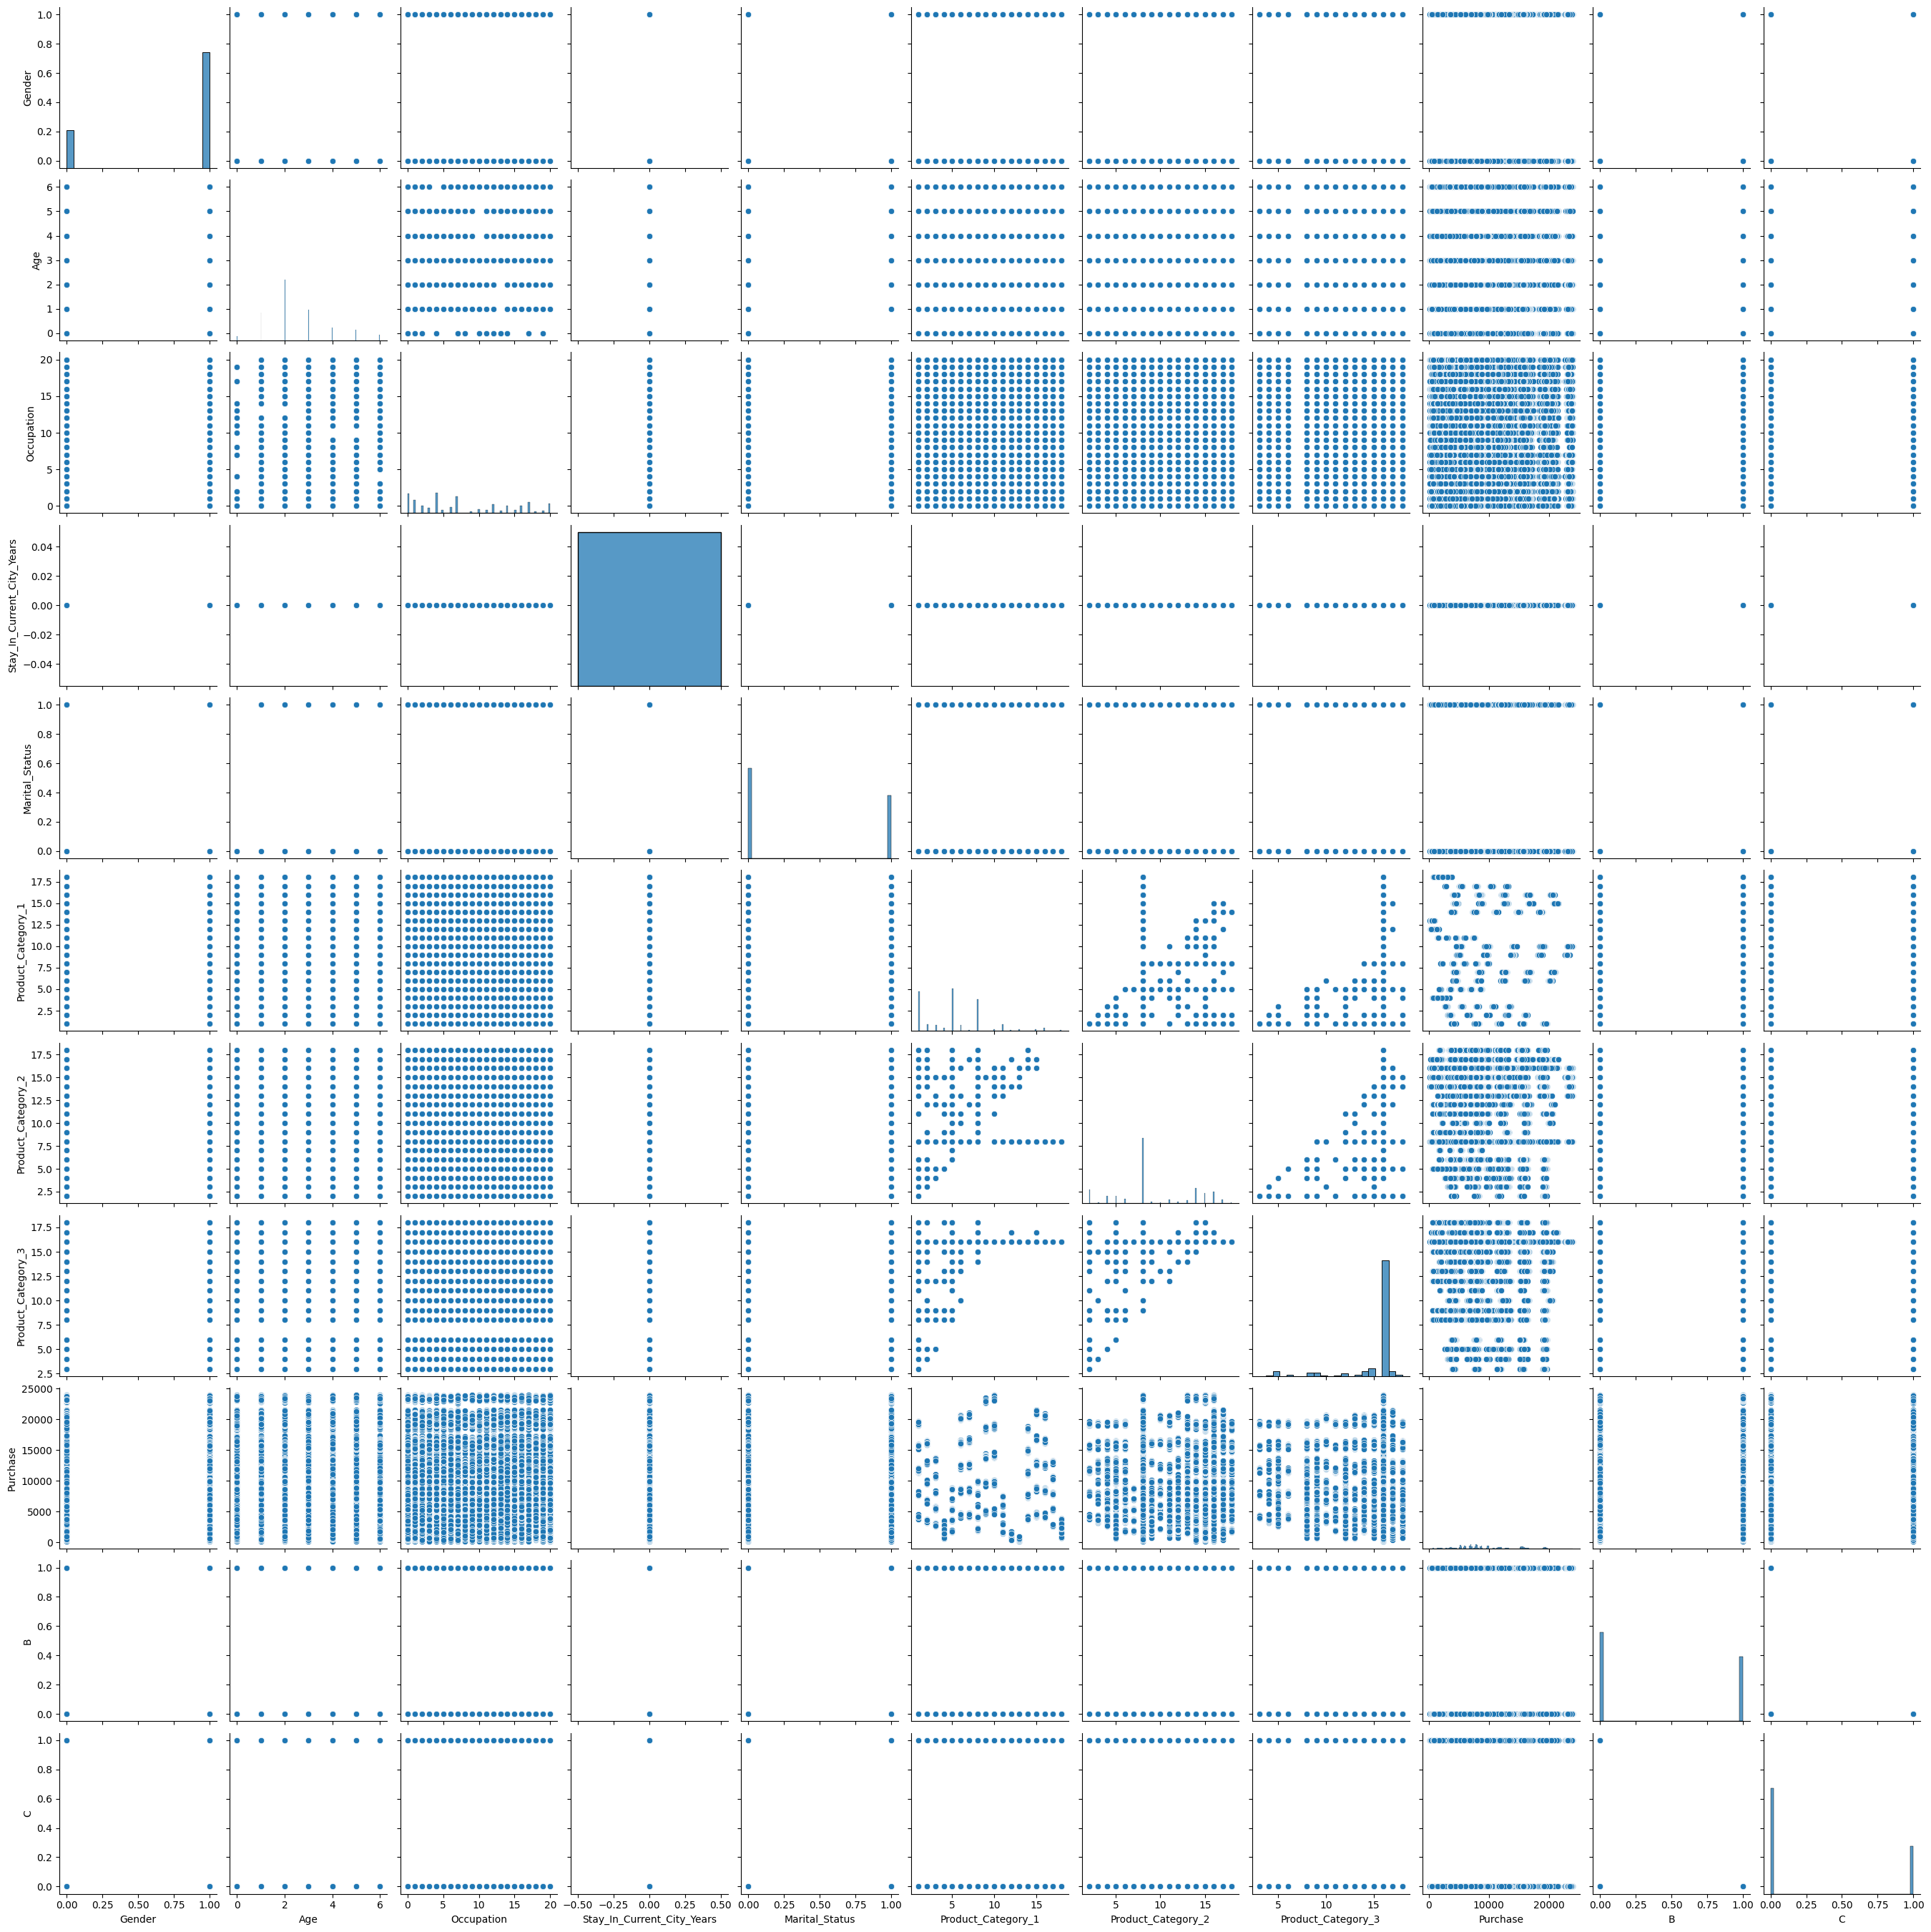

In [151]:
sns.pairplot(df)

In [70]:
#Visulaisation of age vs Purchase

<Axes: xlabel='Age', ylabel='Purchase'>

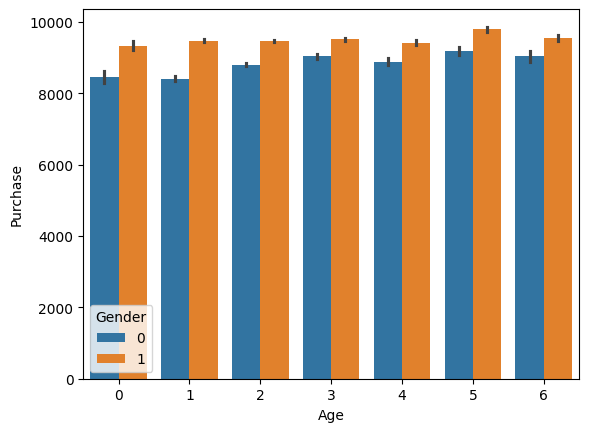

In [72]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

#####Purchasing of men is higher than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

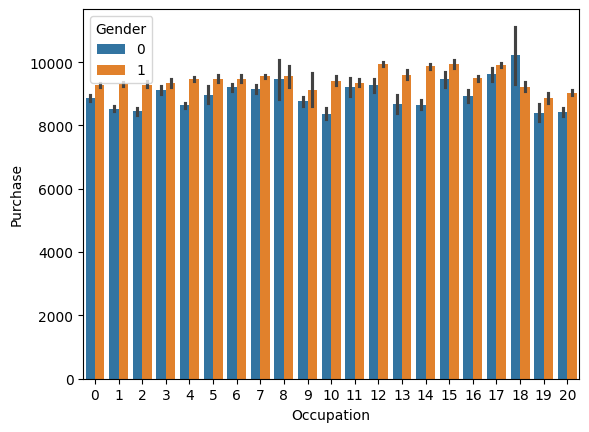

In [73]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

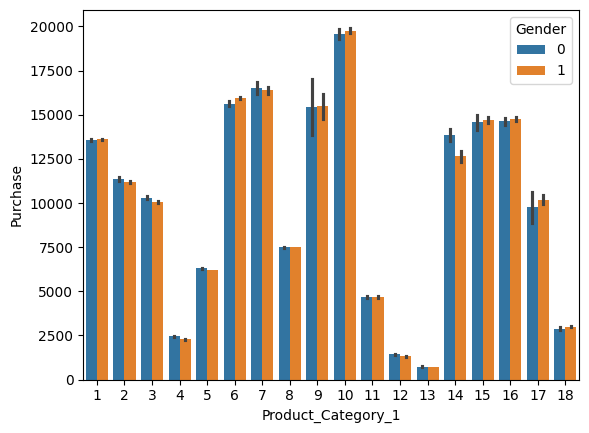

In [75]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

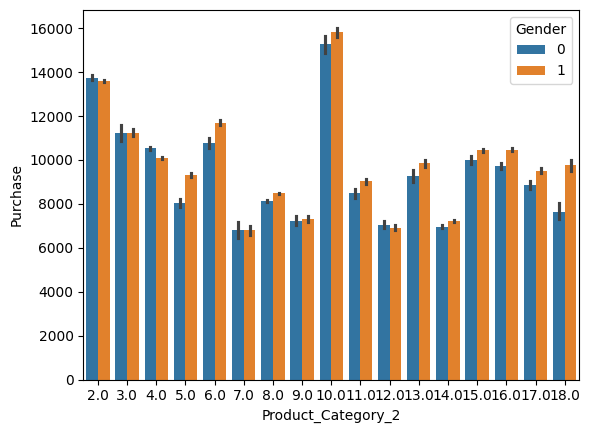

In [76]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

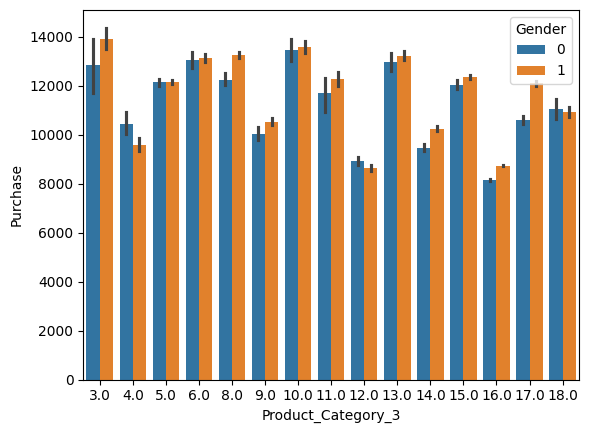

In [77]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [78]:
#Feature Scaling

In [153]:
df_test=df[df['Purchase'].isnull()]

In [154]:

df_train=df[~df['Purchase'].isnull()]

In [155]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,0,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,0,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,0,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,0,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,0,0,8,8.0,16.0,7969.0,0,1


In [156]:
X=df_train.drop('Purchase',axis=1)

In [157]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,0,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,0,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,0,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,0,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,0,0,8,8.0,16.0,0,1


In [158]:
y=df_train['Purchase']

In [159]:
X.shape

(361391, 11)

In [160]:
y.shape

(361391,)

In [172]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,0,0,3,8.0,16.0,0,0
1,P00248942,0,0,10,0,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,0,0,12,8.0,16.0,0,0
3,P00085442,0,0,10,0,0,12,14.0,16.0,0,0
4,P00285442,1,6,16,0,0,8,8.0,16.0,0,1


In [177]:
X_train.head()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
269725,1,2,1,0,0,5,8.0,16.0,1,0
198068,0,2,0,0,0,8,8.0,16.0,0,0
147005,1,2,17,0,0,8,11.0,16.0,1,0
112529,0,2,3,0,0,16,8.0,16.0,0,0
128665,1,3,1,0,0,1,2.0,14.0,1,0


In [178]:
X_train.shape

(242131, 10)

In [175]:
X_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
11795,1,1,0,0,0,5,8.0,16.0,1,0
267427,1,3,7,0,1,2,15.0,16.0,1,0
205154,1,1,18,0,0,8,14.0,16.0,1,0
15965,1,4,12,0,1,1,2.0,9.0,0,1
85866,1,1,4,0,0,1,5.0,6.0,0,1


In [179]:
X_test.shape

(119260, 10)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [162]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242131 entries, 269725 to 121958
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      242131 non-null  int64  
 1   Age                         242131 non-null  int64  
 2   Occupation                  242131 non-null  int64  
 3   Stay_In_Current_City_Years  242131 non-null  int64  
 4   Marital_Status              242131 non-null  int64  
 5   Product_Category_1          242131 non-null  int64  
 6   Product_Category_2          242131 non-null  float64
 7   Product_Category_3          242131 non-null  float64
 8   B                           242131 non-null  int64  
 9   C                           242131 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 20.3 MB


In [164]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
269725,1,2,1,0,0,5,8.0,16.0,1,0
198068,0,2,0,0,0,8,8.0,16.0,0,0
147005,1,2,17,0,0,8,11.0,16.0,1,0
112529,0,2,3,0,0,16,8.0,16.0,0,0
128665,1,3,1,0,0,1,2.0,14.0,1,0


In [165]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

Train the model


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

# Make predictions

In [168]:
y_pred = model.predict(X_test_sc)


Evaluate the model

In [169]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [170]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 21931573.362010494
R^2 Score: 0.11273702646082351


An MSE of 21931573.36 and an R² score of 0.11 suggest that the model is not performing well.

In [181]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_sc, y_train)

RandomForestRegressor(random_state=42)

In [184]:
# Make predictions
y_pred = model.predict(X_test_sc)

In [185]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [186]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

print("Predictions: ", y_pred)

Mean Squared Error: 9474370.988864472
R^2 Score: 0.6167051748984693
Predictions:  [ 6189.76632184 11628.13114683  6237.63471032 ...  5690.16631943
  9587.02366667 16943.23745483]


 the Random Forest model is performing much better than the initial Linear Regression model
